In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("df_cc.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df['date_time'] = pd.to_datetime(df['date_time']).dt.floor('min')
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,DD_WE,DD_NS,Po(p),POA
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242


In [3]:
df.dtypes

id                          int64
device_id                   int64
active_power              float64
direct_power              float64
charge_capacity           float64
date_time          datetime64[ns]
T                         float64
U                         float64
Ff                        float64
RRR                       float64
DD_WE                       int64
DD_NS                       int64
Po(p)                     float64
POA                       float64
dtype: object

In [4]:
df_5 = df[(df['date_time'].dt.hour.isin([5])) & (df['charge_capacity'] != 0)]
df_5

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,DD_WE,DD_NS,Po(p),POA


In [5]:
df['difference'] = df['date_time'] - df['date_time'].shift(5)
df_diff = df[(df['date_time'].dt.hour != 5) & (df['difference'] != pd.Timedelta(hours=3))]
df_diff

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,DD_WE,DD_NS,Po(p),POA,difference
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT
695,36803,6,1.04,1.30,367.7,2023-12-11 17:00:00,19.7,82.0,4.0,0.0,1,0,1001.15,1.248620,65 days 09:00:00
696,36804,7,0.96,1.28,371.1,2023-12-11 17:00:00,19.7,82.0,4.0,0.0,1,0,1001.15,1.248620,65 days 09:00:00
697,36805,8,0.76,1.22,352.5,2023-12-11 17:00:00,19.7,82.0,4.0,0.0,1,0,1001.15,1.248620,65 days 09:00:00
698,36806,9,0.87,1.27,442.2,2023-12-11 17:00:00,19.7,82.0,4.0,0.0,1,0,1001.15,1.248620,65 days 09:00:00
699,36807,10,0.82,1.26,318.1,2023-12-11 17:00:00,19.7,82.0,4.0,0.0,1,0,1001.15,1.248620,65 days 09:00:00


In [6]:
df['cc_diff'] = df['charge_capacity'] - df['charge_capacity'].shift(5)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,DD_WE,DD_NS,Po(p),POA,difference,cc_diff
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT,NaN
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT,NaN
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT,NaN
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT,NaN
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1,0,996.39,441.366227,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242,0 days 03:00:00,29.8
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242,0 days 03:00:00,29.5
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242,0 days 03:00:00,29.4
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,1,1,1009.88,881.804242,0 days 03:00:00,31.1


In [7]:
df['POA'] = df['POA'].round(2)

In [8]:
columns = ['active_power', 'date_time', 'T', 'U', 'Ff', 'RRR', 'DD_WE', 'DD_NS', 'Po(p)', 'POA']
for col in columns:
    df[f'{col}_b'] = df[col].shift(5)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.75,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.74,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.91,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,5.23,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15


In [9]:
df.dtypes

id                           int64
device_id                    int64
active_power               float64
direct_power               float64
charge_capacity            float64
date_time           datetime64[ns]
T                          float64
U                          float64
Ff                         float64
RRR                        float64
DD_WE                        int64
DD_NS                        int64
Po(p)                      float64
POA                        float64
difference         timedelta64[ns]
cc_diff                    float64
active_power_b             float64
date_time_b         datetime64[ns]
T_b                        float64
U_b                        float64
Ff_b                       float64
RRR_b                      float64
DD_WE_b                    float64
DD_NS_b                    float64
Po(p)_b                    float64
POA_b                      float64
dtype: object

In [10]:
df_filtered = df[df['difference'] == pd.Timedelta(hours=3)]
df_filtered

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b
5,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,31.25,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
6,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,35.22,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
7,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,39.62,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
8,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,50.39,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
9,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,25.24,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.75,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.74,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.91,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,5.23,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15


In [11]:
df_diff = df_filtered[df_filtered['date_time'].dt.hour == 5]
df_diff

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b


In [12]:
df = df_filtered
df = df.copy()
df['cc_diff'] = df['cc_diff'].round(1)
df.to_csv('df_cc_duplicate.csv')

In [13]:
df.drop('difference', axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b
5,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,31.25,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
6,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,35.22,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
7,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,39.62,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
8,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,50.39,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
9,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,25.24,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.75,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.74,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.91,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,5.23,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15


In [14]:
df['hour'] = df['date_time'].dt.hour 
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
5,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
6,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
7,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
8,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
9,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2881,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2882,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2883,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [15]:
df.dtypes

id                          int64
device_id                   int64
active_power              float64
direct_power              float64
charge_capacity           float64
date_time          datetime64[ns]
T                         float64
U                         float64
Ff                        float64
RRR                       float64
DD_WE                       int64
DD_NS                       int64
Po(p)                     float64
POA                       float64
cc_diff                   float64
active_power_b            float64
date_time_b        datetime64[ns]
T_b                       float64
U_b                       float64
Ff_b                      float64
RRR_b                     float64
DD_WE_b                   float64
DD_NS_b                   float64
Po(p)_b                   float64
POA_b                     float64
hour                        int32
dtype: object

In [16]:
df.drop(['date_time', 'date_time_b'], axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
5,19128,6,65.24,66.29,195.2,31.2,60.0,2.0,0.0,1,...,31.25,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
6,19129,7,72.97,74.12,196.3,31.2,60.0,2.0,0.0,1,...,35.22,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
7,19130,8,65.92,66.98,199.0,31.2,60.0,2.0,0.0,1,...,39.62,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
8,19131,9,72.45,73.67,232.2,31.2,60.0,2.0,0.0,1,...,50.39,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
9,19132,10,60.01,60.98,182.0,31.2,60.0,2.0,0.0,1,...,25.24,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,50268,6,8.44,8.78,55.4,8.0,96.0,2.0,4.0,1,...,4.75,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2881,50269,7,7.66,7.94,55.2,8.0,96.0,2.0,4.0,1,...,4.74,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2882,50270,8,8.21,8.45,54.5,8.0,96.0,2.0,4.0,1,...,4.91,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2883,50271,9,9.55,9.84,58.0,8.0,96.0,2.0,4.0,1,...,5.23,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [17]:
df.isna().any()

id                 False
device_id          False
active_power       False
direct_power       False
charge_capacity    False
T                  False
U                  False
Ff                 False
RRR                 True
DD_WE              False
DD_NS              False
Po(p)              False
POA                False
cc_diff            False
active_power_b     False
T_b                False
U_b                False
Ff_b               False
RRR_b              False
DD_WE_b            False
DD_NS_b            False
Po(p)_b            False
POA_b              False
hour               False
dtype: bool

In [21]:
nan_rows = df[df['RRR'].isna()]
nan_rows['id']

530     32723
531     32724
532     32725
533     32726
534     32727
2110    47178
2111    47179
2112    47180
2113    47181
2114    47182
2200    47538
2201    47539
2202    47540
2203    47541
2204    47542
2260    47778
2261    47779
2262    47780
2263    47781
2264    47782
Name: id, dtype: int64

In [22]:
# 10-01 6
# 01-27 0
# 01-30 0.5
# 02-01 0

start_index = df.index.get_loc(530)
end_index = start_index + 5
df.loc[df.index[start_index:end_index], 'RRR'] = 6

start_index = df.index.get_loc(2110)
end_index = start_index + 5
df.loc[df.index[start_index:end_index], 'RRR'] = 0

start_index = df.index.get_loc(2200)
end_index = start_index + 5
df.loc[df.index[start_index:end_index], 'RRR'] = 0.5

start_index = df.index.get_loc(2260)
end_index = start_index + 5
df.loc[df.index[start_index:end_index], 'RRR'] = 0

df.isna().any()

id                 False
device_id          False
active_power       False
direct_power       False
charge_capacity    False
T                  False
U                  False
Ff                 False
RRR                False
DD_WE              False
DD_NS              False
Po(p)              False
POA                False
cc_diff            False
active_power_b     False
T_b                False
U_b                False
Ff_b               False
RRR_b              False
DD_WE_b            False
DD_NS_b            False
Po(p)_b            False
POA_b              False
hour               False
dtype: bool

In [23]:
df.to_csv('models_cc_data/df_cc_init.csv')

In [68]:
df_dv6 = df[df['device_id'] == 6]
df_dv6.to_csv('models_cc_data/df_dv6.csv')
df_dv6

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
5,19128,6,65.24,66.29,195.2,31.2,60.0,2.0,0.0,1,...,31.25,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
10,19218,6,77.74,79.08,444.6,31.2,63.0,3.0,0.0,1,...,65.24,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
15,19308,6,11.43,11.73,565.7,28.6,75.0,5.0,0.0,1,...,77.74,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
20,19398,6,0.00,0.00,568.1,28.0,79.0,2.0,0.0,1,...,11.43,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
30,19758,6,16.76,17.11,20.1,27.9,83.0,2.0,0.0,-1,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,50163,6,1.69,1.98,140.8,15.3,97.0,3.0,0.0,1,...,12.24,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2860,50178,6,0.00,0.00,141.3,13.4,98.0,3.0,0.7,1,...,1.69,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2870,50238,6,0.93,1.35,0.6,8.6,98.0,2.0,5.0,1,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2875,50253,6,4.75,5.07,25.6,8.5,98.0,2.0,5.0,1,...,0.93,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [69]:
df_dv7 = df[df['device_id'] == 7]
df_dv7.to_csv('models_cc_data/df_dv7.csv')
df_dv7

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
6,19129,7,72.97,74.12,196.3,31.2,60.0,2.0,0.0,1,...,35.22,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
11,19219,7,79.34,80.84,447.2,31.2,63.0,3.0,0.0,1,...,72.97,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
16,19309,7,8.81,9.11,571.1,28.6,75.0,5.0,0.0,1,...,79.34,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
21,19399,7,0.00,0.00,573.3,28.0,79.0,2.0,0.0,1,...,8.81,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
31,19759,7,46.70,47.42,19.1,27.9,83.0,2.0,0.0,-1,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,50164,7,1.65,2.02,142.2,15.3,97.0,3.0,0.0,1,...,13.17,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2861,50179,7,0.00,0.00,142.6,13.4,98.0,3.0,0.7,1,...,1.65,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2871,50239,7,0.92,1.28,0.6,8.6,98.0,2.0,5.0,1,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2876,50254,7,4.74,5.08,25.7,8.5,98.0,2.0,5.0,1,...,0.92,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [70]:
df_dv8 = df[df['device_id'] == 8]
df_dv8.to_csv('models_cc_data/df_dv8.csv')
df_dv8

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
7,19130,8,65.92,66.98,199.0,31.2,60.0,2.0,0.0,1,...,39.62,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
12,19220,8,77.25,78.58,450.9,31.2,63.0,3.0,0.0,1,...,65.92,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
17,19310,8,7.89,8.11,565.2,28.6,75.0,5.0,0.0,1,...,77.25,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
22,19400,8,0.00,0.00,567.3,28.0,79.0,2.0,0.0,1,...,7.89,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
32,19760,8,45.20,45.87,20.0,27.9,83.0,2.0,0.0,-1,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,50165,8,1.63,2.01,141.4,15.3,97.0,3.0,0.0,1,...,13.28,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2862,50180,8,0.00,0.00,141.8,13.4,98.0,3.0,0.7,1,...,1.63,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2872,50240,8,0.89,1.38,0.5,8.6,98.0,2.0,5.0,1,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2877,50255,8,4.91,5.09,25.1,8.5,98.0,2.0,5.0,1,...,0.89,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [71]:
df_dv9 = df[df['device_id'] == 9]
df_dv9.to_csv('models_cc_data/df_dv9.csv')
df_dv9

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
8,19131,9,72.45,73.67,232.2,31.2,60.0,2.0,0.0,1,...,50.39,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
13,19221,9,81.16,82.51,492.9,31.2,63.0,3.0,0.0,1,...,72.45,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
18,19311,9,10.24,10.67,614.2,28.6,75.0,5.0,0.0,1,...,81.16,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
23,19401,9,0.00,0.00,616.7,28.0,79.0,2.0,0.0,1,...,10.24,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
33,19761,9,62.12,62.96,25.3,27.9,83.0,2.0,0.0,-1,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,50166,9,1.04,1.33,155.5,15.3,97.0,3.0,0.0,1,...,12.89,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2863,50181,9,0.00,0.00,156.1,13.4,98.0,3.0,0.7,1,...,1.04,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2873,50241,9,1.03,1.32,0.7,8.6,98.0,2.0,5.0,1,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2878,50256,9,5.23,5.56,26.9,8.5,98.0,2.0,5.0,1,...,1.03,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [72]:
df_dv10 = df[df['device_id'] == 10]
df_dv10.to_csv('models_cc_data/df_dv10.csv')
df_dv10

,id,device_id,active_power,direct_power,charge_capacity,T,U,Ff,RRR,DD_WE,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
9,19132,10,60.01,60.98,182.0,31.2,60.0,2.0,0.0,1,...,25.24,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
14,19222,10,78.86,80.19,419.1,31.2,63.0,3.0,0.0,1,...,60.01,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
19,19312,10,11.47,11.85,549.7,28.6,75.0,5.0,0.0,1,...,78.86,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
24,19402,10,0.00,0.00,552.1,28.0,79.0,2.0,0.0,1,...,11.47,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
34,19762,10,15.29,15.63,17.4,27.9,83.0,2.0,0.0,-1,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,50167,10,1.05,1.39,143.1,15.3,97.0,3.0,0.0,1,...,12.79,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2864,50182,10,0.00,0.00,143.6,13.4,98.0,3.0,0.7,1,...,1.05,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2874,50242,10,0.98,1.32,0.6,8.6,98.0,2.0,5.0,1,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2879,50257,10,4.87,5.28,26.0,8.5,98.0,2.0,5.0,1,...,0.98,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [116]:
from sklearn.model_selection import train_test_split
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

features2 = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b', 'device_id']

X = df[features2]
y = df['cc_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())


X6 = df_dv6[features]
y6 = df_dv6['cc_diff']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.20, random_state=100)

X_train6 = X_train6.fillna(X_train6.mean())
X_test6 = X_test6.fillna(X_test6.mean())
y_train6 = y_train6.fillna(y_train6.mean())
y_test6 = y_test6.fillna(y_test6.mean())


X7 = df_dv7[features]
y7 = df_dv7['cc_diff']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.20, random_state=100)

X_train7 = X_train7.fillna(X_train7.mean())
X_test7 = X_test7.fillna(X_test7.mean())
y_train7 = y_train7.fillna(y_train7.mean())
y_test7 = y_test7.fillna(y_test7.mean())


X8 = df_dv8[features]
y8 = df_dv8['cc_diff']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.20, random_state=100)

X_train8 = X_train8.fillna(X_train8.mean())
X_test8 = X_test8.fillna(X_test8.mean())
y_train8 = y_train8.fillna(y_train8.mean())
y_test8 = y_test8.fillna(y_test8.mean())


X9 = df_dv9[features]
y9 = df_dv9['cc_diff']
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.20, random_state=100)

X_train9 = X_train9.fillna(X_train9.mean())
X_test9 = X_test9.fillna(X_test9.mean())
y_train9 = y_train9.fillna(y_train9.mean())
y_test9 = y_test9.fillna(y_test9.mean())


X10 = df_dv10[features]
y10 = df_dv10['cc_diff']
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.20, random_state=100)

X_train10 = X_train10.fillna(X_train10.mean())
X_test10 = X_test10.fillna(X_test10.mean())
y_train10 = y_train10.fillna(y_train10.mean())
y_test10 = y_test10.fillna(y_test10.mean())

device_6:
MAE: 22.351129822961827
MSE: 932.8552581065127
RMSE: 30.542679288276474
R2: 0.7785047739846842

device_7:
MAE: 22.578185443135297
MSE: 930.2596392397536
RMSE: 30.50015801991448
R2: 0.7829604050699916

device_8:
MAE: 22.330768420168862
MSE: 896.2715196785258
RMSE: 29.937794168550994
R2: 0.7838166948490449

device_9:
MAE: 27.598153035262413
MSE: 1317.348726382607
RMSE: 36.295298957063395
R2: 0.7957205927591936

device_10:
MAE: 20.21184616881327
MSE: 778.7330133256745
RMSE: 27.90578816886695
R2: 0.7744564847701974

all:
MAE: 24.549627797637218
MSE: 1014.8871560564999
RMSE: 31.85729360847371
R2: 0.8162143804439308



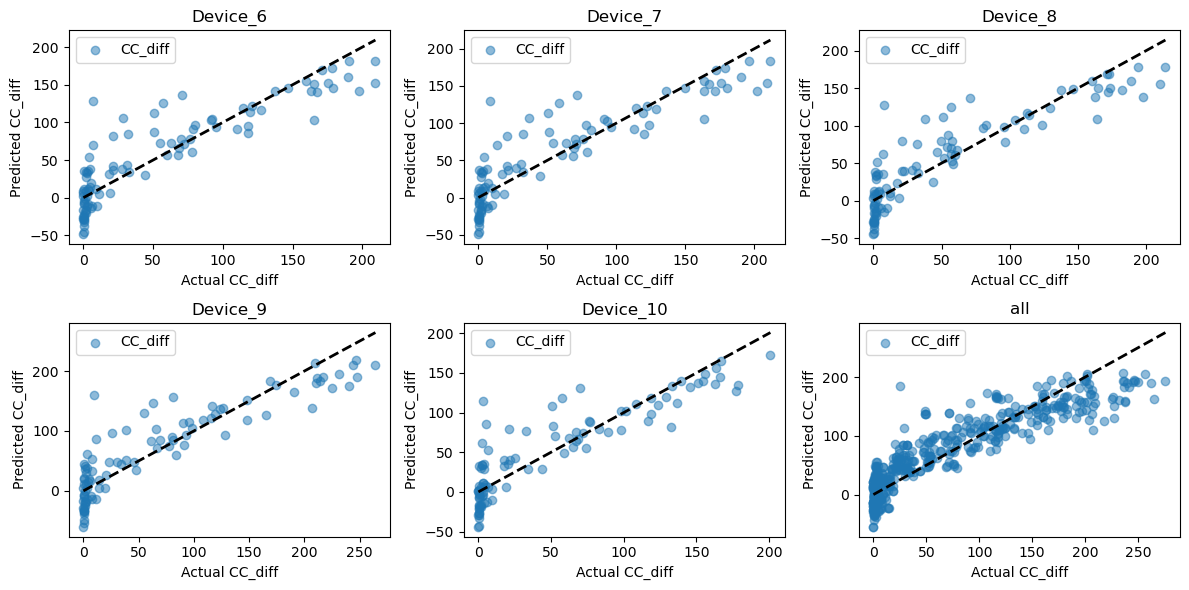

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

lr6 = LinearRegression()
lr6.fit(X_train6, y_train6)
y_pred6 = lr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
# print('MAPE:', np.mean(np.abs((y_test6 - y_pred6)/y_test6)))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


lr7 = LinearRegression()
lr7.fit(X_train7, y_train7)
y_pred7 = lr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
# print('MAPE:', np.mean(np.abs((y_test7 - y_pred7)/y_test7)))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


lr8 = LinearRegression()
lr8.fit(X_train8, y_train8)
y_pred8 = lr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
# print('MAPE:', np.mean(np.abs((y_test8 - y_pred8)/y_test8)))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


lr9 = LinearRegression()
lr9.fit(X_train9, y_train9)
y_pred9 = lr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
# print('MAPE:', np.mean(np.abs((y_test9 - y_pred9)/y_test9)))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


lr10 = LinearRegression()
lr10.fit(X_train10, y_train10)
y_pred10 = lr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
# print('MAPE:', np.mean(np.abs((y_test10 - y_pred10)/y_test10)))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MAPE:', np.mean(np.abs((y_test - y_pred)/y_test)))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()

device_6:
MAE: 15.772083333333333
MSE: 906.6735583333334
RMSE: 30.11102054619427
R2: 0.7847213027101549

device_7:
MAE: 15.887083333333331
MSE: 916.7241083333332
RMSE: 30.277452144018547
R2: 0.7861183902401243

device_8:
MAE: 15.091041666666664
MSE: 879.4114625000001
RMSE: 29.654872491717107
R2: 0.7878833898246871

device_9:
MAE: 19.182708333333334
MSE: 1443.0016041666665
RMSE: 37.9868609412079
R2: 0.7762357783909334

device_10:
MAE: 14.131666666666666
MSE: 738.6204083333333
RMSE: 27.17757178876239
R2: 0.7860742507826592

all:
MAE: 10.202630480167015
MSE: 383.5932584551149
RMSE: 19.585536971324398
R2: 0.9305352085283658



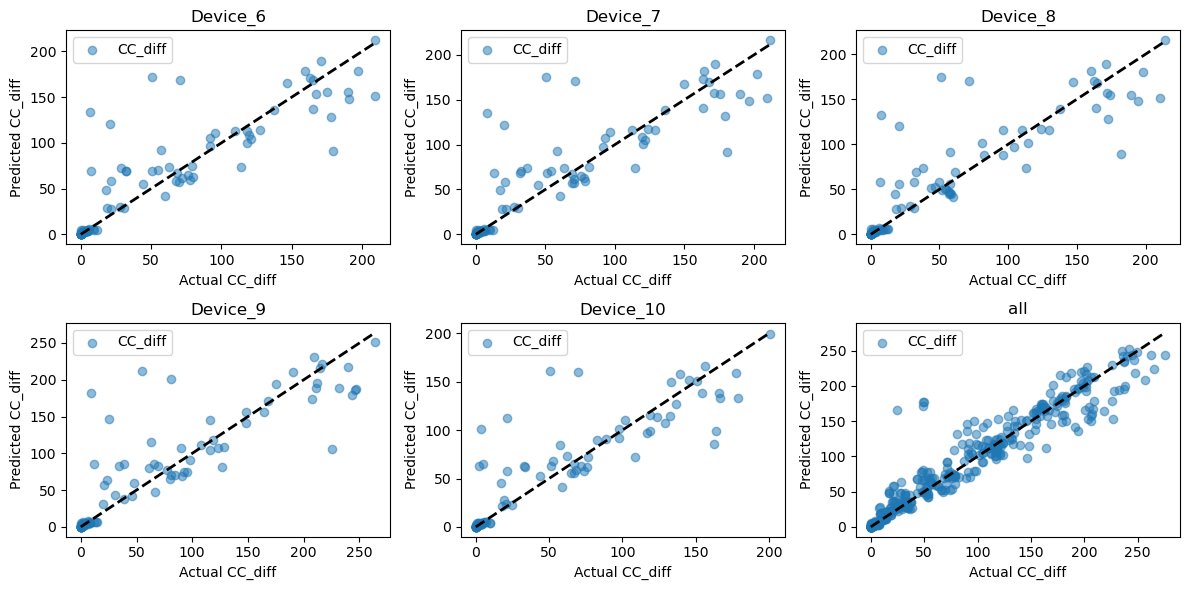

In [118]:
from sklearn.neighbors import KNeighborsRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

knn6 = KNeighborsRegressor(n_neighbors=5)
knn6.fit(X_train6, y_train6)
y_pred6 = knn6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
# print('MAPE:', np.mean(np.abs((y_test6 - y_pred6)/y_test6)))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


knn7 = KNeighborsRegressor(n_neighbors=5)
knn7.fit(X_train7, y_train7)
y_pred7 = knn7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
# print('MAPE:', np.mean(np.abs((y_test7 - y_pred7)/y_test7)))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


knn8 = KNeighborsRegressor(n_neighbors=5)
knn8.fit(X_train8, y_train8)
y_pred8 = knn8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
# print('MAPE:', np.mean(np.abs((y_test8 - y_pred8)/y_test8)))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


knn9 = KNeighborsRegressor(n_neighbors=5)
knn9.fit(X_train9, y_train9)
y_pred9 = knn9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
# print('MAPE:', np.mean(np.abs((y_test9 - y_pred9)/y_test9)))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


knn10 = KNeighborsRegressor(n_neighbors=5)
knn10.fit(X_train10, y_train10)
y_pred10 = knn10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
# print('MAPE:', np.mean(np.abs((y_test10 - y_pred10)/y_test10)))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MAPE:', np.mean(np.abs((y_test - y_pred)/y_test)))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 14.46875
MSE: 791.320625
RMSE: 28.130421699647517
R2: 0.8121104649817568

device_7:
MAE: 14.040625
MSE: 697.5584375
RMSE: 26.411331611639728
R2: 0.8372521021779059

device_8:
MAE: 15.633333333333335
MSE: 887.7235416666666
RMSE: 29.794689823300168
R2: 0.7858784920816785

device_9:
MAE: 22.480208333333334
MSE: 2154.128645833333
RMSE: 46.41259145785045
R2: 0.6659623119691171

device_10:
MAE: 13.721875000000002
MSE: 704.8534374999999
RMSE: 26.549076019703584
R2: 0.7958541383308801

all:
MAE: 5.717745302713988
MSE: 245.89887265135698
RMSE: 15.681162987844907
R2: 0.9554702447570903



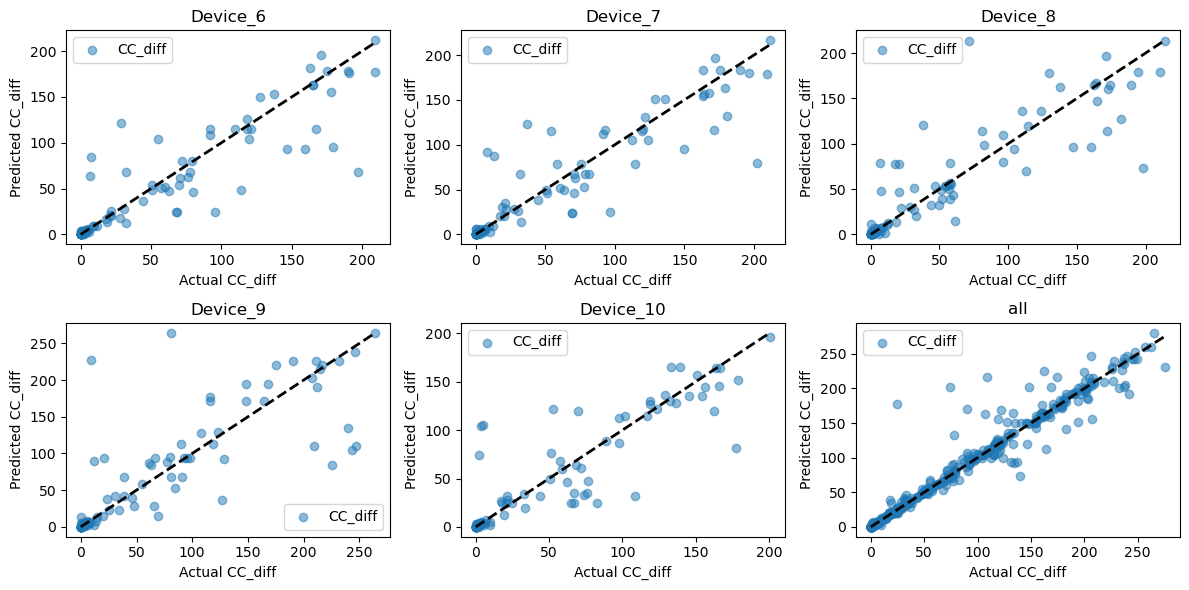

In [119]:
from sklearn.tree import DecisionTreeRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

dtr6 = DecisionTreeRegressor(random_state=100)
dtr6.fit(X_train6, y_train6)
y_pred6 = dtr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


dtr7 = DecisionTreeRegressor(random_state=100)
dtr7.fit(X_train7, y_train7)
y_pred7 = dtr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


dtr8 = DecisionTreeRegressor(random_state=100)
dtr8.fit(X_train8, y_train8)
y_pred8 = dtr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


dtr9 = DecisionTreeRegressor(random_state=100)
dtr9.fit(X_train9, y_train9)
y_pred9 = dtr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


dtr10 = DecisionTreeRegressor(random_state=100)
dtr10.fit(X_train10, y_train10)
y_pred10 = dtr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()


dtr = DecisionTreeRegressor(random_state=100)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 13.714885416666666
MSE: 679.1700284270831
RMSE: 26.06089078345334
R2: 0.8387392710262144

device_7:
MAE: 13.38378124999999
MSE: 642.1680479479163
RMSE: 25.34103486339728
R2: 0.8501752767458409

device_8:
MAE: 12.872760416666663
MSE: 617.8232338020836
RMSE: 24.85605024540471
R2: 0.8509792336921606

device_9:
MAE: 16.51869791666667
MSE: 1063.685003427083
RMSE: 32.61418408341811
R2: 0.8350558681696324

device_10:
MAE: 13.014729166666669
MSE: 529.8338873958334
RMSE: 23.018120848493115
R2: 0.8465448421907968

all:
MAE: 4.544171189979122
MSE: 103.00117010438404
RMSE: 10.148949211833905
R2: 0.9813475480996426



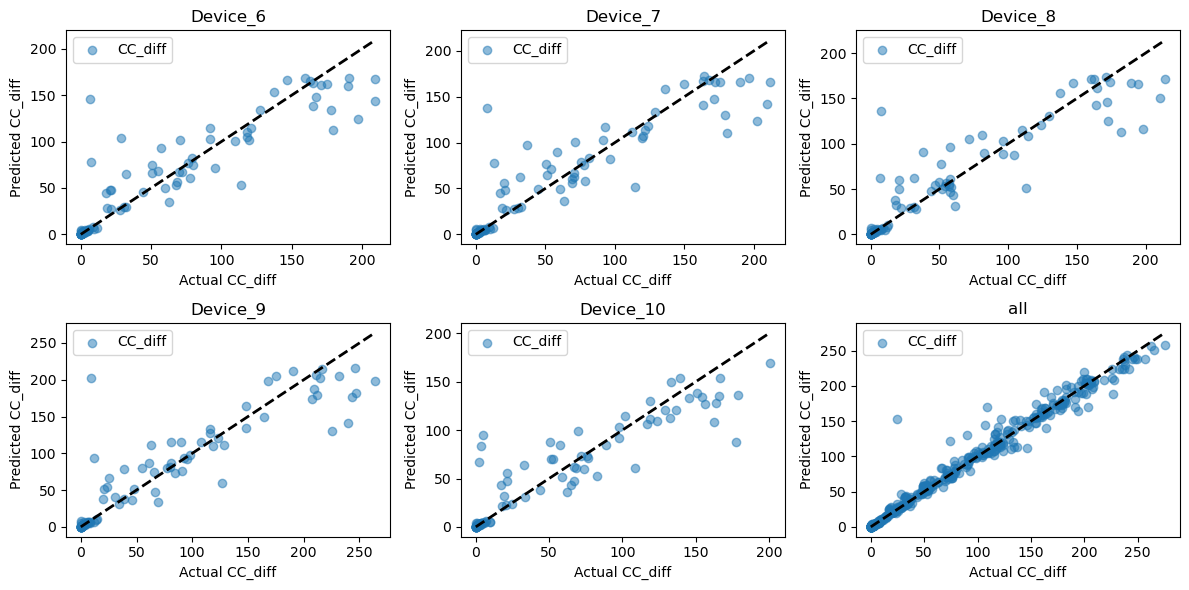

In [120]:
from sklearn.ensemble import RandomForestRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

rfr6 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr6.fit(X_train6, y_train6)
y_pred6 = rfr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


rfr7 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr7.fit(X_train7, y_train7)
y_pred7 = rfr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


rfr8 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr8.fit(X_train8, y_train8)
y_pred8 = rfr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


rfr9 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr9.fit(X_train9, y_train9)
y_pred9 = rfr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


rfr10 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr10.fit(X_train10, y_train10)
y_pred10 = rfr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

rfr = RandomForestRegressor(n_estimators=100, random_state=100)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 15.852997802093084
MSE: 619.295003399941
RMSE: 24.885638496931136
R2: 0.8529558733188127

device_7:
MAE: 16.972266035071268
MSE: 862.5944729981829
RMSE: 29.36995868226891
R2: 0.7987474172679456

device_8:
MAE: 16.162530311420227
MSE: 899.3255709225197
RMSE: 29.988757408777705
R2: 0.7830800487797112

device_9:
MAE: 18.90759478654683
MSE: 1269.9013437740016
RMSE: 35.635675155299104
R2: 0.8030781913967457

device_10:
MAE: 17.832763549520237
MSE: 807.2687995216064
RMSE: 28.412476124435308
R2: 0.7661916989985108

all:
MAE: 6.359968362285278
MSE: 174.05175023919247
RMSE: 13.192867400197445
R2: 0.9684810192328935



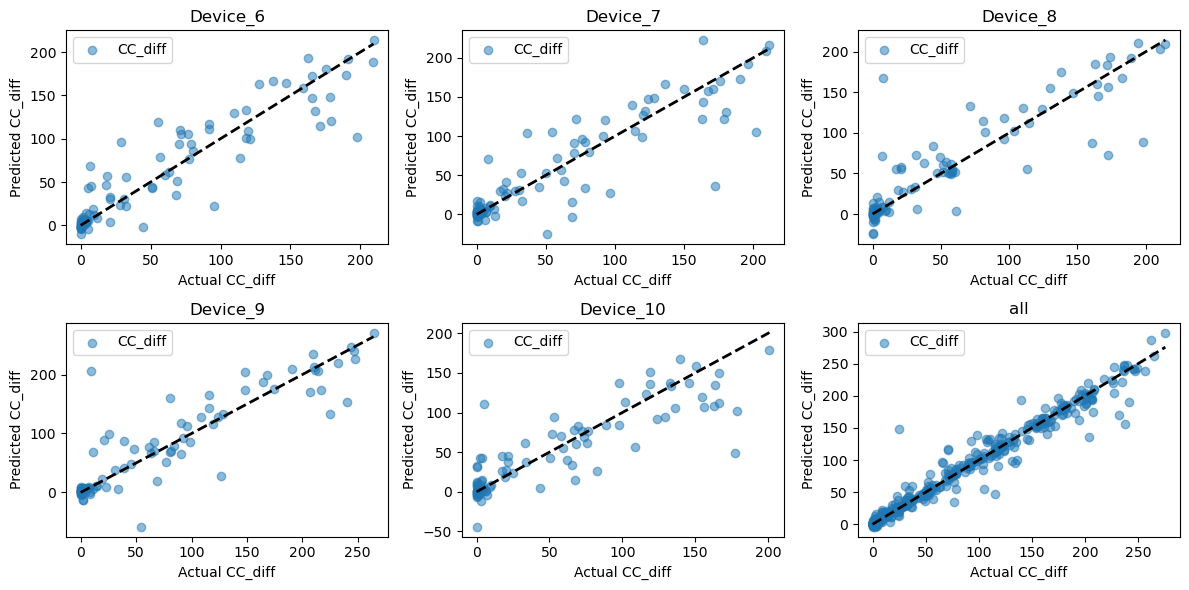

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

gbr6 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr6.fit(X_train6, y_train6)
y_pred6 = gbr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()

gbr7 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr7.fit(X_train7, y_train7)
y_pred7 = gbr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()

gbr8 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr8.fit(X_train8, y_train8)
y_pred8 = gbr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()

gbr9 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr9.fit(X_train9, y_train9)
y_pred9 = gbr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()

gbr10 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr10.fit(X_train10, y_train10)
y_pred10 = gbr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()

plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 17
[LightGBM] [Info] Start training from score 66.278590
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

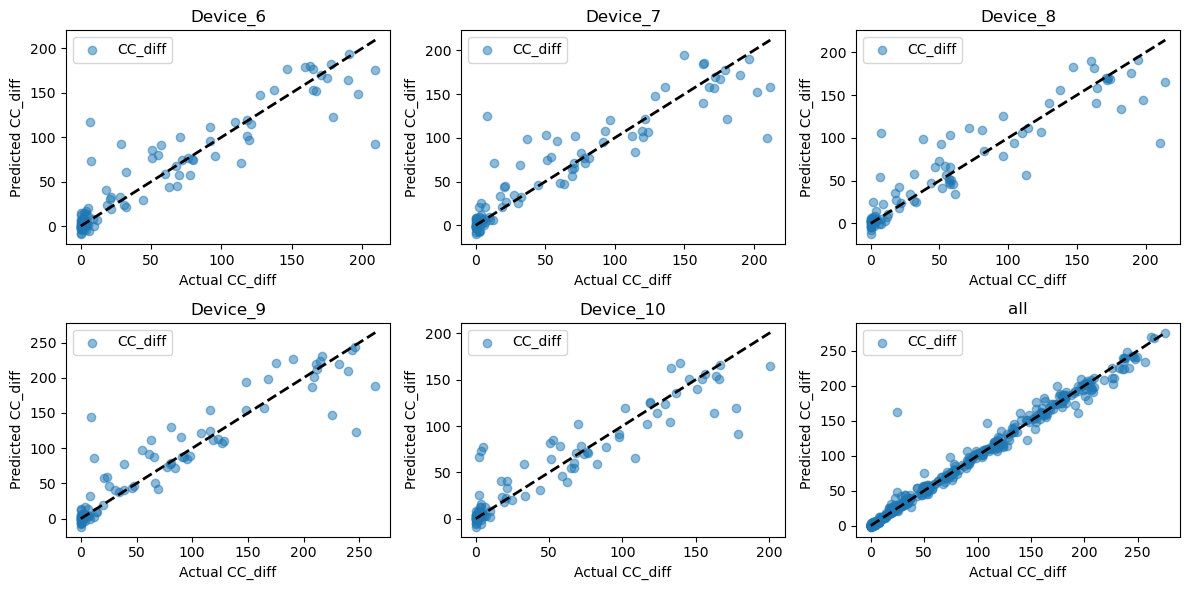

In [122]:
import lightgbm as lgb

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.2,
    'feature_fraction': 0.9,
}

lgb_train6 = lgb.Dataset(X_train6, y_train6)
lgb_test6 = lgb.Dataset(X_test6, y_test6, reference=lgb_train6)

gbm6 = lgb.train(params, lgb_train6, num_boost_round=100, valid_sets=[lgb_test6])
y_pred6 = gbm6.predict(X_test6, num_iteration=gbm6.best_iteration)


axs[0, 0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0, 0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0, 0].set_title('Device_6')
axs[0, 0].set_ylabel('Predicted CC_diff')
axs[0, 0].set_xlabel('Actual CC_diff')
axs[0, 0].legend()


lgb_train7 = lgb.Dataset(X_train7, y_train7)
lgb_test7 = lgb.Dataset(X_test7, y_test7, reference=lgb_train7)

gbm7 = lgb.train(params, lgb_train7, num_boost_round=100, valid_sets=[lgb_test7])
y_pred7 = gbm7.predict(X_test7, num_iteration=gbm7.best_iteration)


axs[0, 1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0, 1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0, 1].set_title('Device_7')
axs[0, 1].set_ylabel('Predicted CC_diff')
axs[0, 1].set_xlabel('Actual CC_diff')
axs[0, 1].legend()


lgb_train8 = lgb.Dataset(X_train8, y_train8)
lgb_test8 = lgb.Dataset(X_test8, y_test8, reference=lgb_train8)

gbm8 = lgb.train(params, lgb_train8, num_boost_round=100, valid_sets=[lgb_test8])
y_pred8 = gbm8.predict(X_test8, num_iteration=gbm8.best_iteration)



axs[0, 2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0, 2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0, 2].set_title('Device_8')
axs[0, 2].set_ylabel('Predicted CC_diff')
axs[0, 2].set_xlabel('Actual CC_diff')
axs[0, 2].legend()


lgb_train9 = lgb.Dataset(X_train9, y_train9)
lgb_test9 = lgb.Dataset(X_test9, y_test9, reference=lgb_train9)

gbm9 = lgb.train(params, lgb_train9, num_boost_round=100, valid_sets=[lgb_test9])
y_pred9 = gbm9.predict(X_test9, num_iteration=gbm9.best_iteration)



axs[1, 0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1, 0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1, 0].set_title('Device_9')
axs[1, 0].set_ylabel('Predicted CC_diff')
axs[1, 0].set_xlabel('Actual CC_diff')
axs[1, 0].legend()


lgb_train10 = lgb.Dataset(X_train10, y_train10)
lgb_test10 = lgb.Dataset(X_test10, y_test10, reference=lgb_train10)

gbm10 = lgb.train(params, lgb_train10, num_boost_round=100, valid_sets=[lgb_test10])
y_pred10 = gbm10.predict(X_test10, num_iteration=gbm10.best_iteration)


axs[1, 1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1, 1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1, 1].set_title('Device_10')
axs[1, 1].set_ylabel('Predicted CC_diff')
axs[1, 1].set_xlabel('Actual CC_diff')
axs[1, 1].legend()


lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_test])
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

axs[1, 2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1, 2].set_title('all')
axs[1, 2].set_ylabel('Predicted CC_diff')
axs[1, 2].set_xlabel('Actual CC_diff')
axs[1, 2].legend()


print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()


plt.tight_layout()
plt.show()

device_6:
MAE: 14.397149625094004
MSE: 600.5882959598024
RMSE: 24.506903026694385
R2: 0.8573975553015741

device_7:
MAE: 14.844166312993408
MSE: 635.0804458219712
RMSE: 25.2008024836903
R2: 0.8518288906720534

device_8:
MAE: 14.318926507913423
MSE: 598.1946398619011
RMSE: 24.45801790542114
R2: 0.8557137078110935

device_9:
MAE: 16.1592857528242
MSE: 818.2579346849483
RMSE: 28.60520817412361
R2: 0.8731138972392491

device_10:
MAE: 12.883477312992136
MSE: 455.67806804407695
RMSE: 21.346617250610855
R2: 0.8680225038349509

all:
MAE: 3.9573824376992572
MSE: 78.7734677614835
RMSE: 8.875441834719188
R2: 0.985734935661834